In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [79]:
# import matplotlib.font_manager as fm

# fm.get_fontconfig_fonts()
# font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
# font_name = fm.FontProperties(fname=font_location).get_name()
# plt.rc('font', family=font_name)

## 키워드 데이터 만들기

### 데이터 불러오기

In [2]:
us_broad = pd.read_csv("C:/Users/USER/Desktop/대학/6학기/시각화/dataviz_finalpj/원본데이터/미국_방송사_1년.csv")
us_press = pd.read_csv("C:/Users/USER/Desktop/대학/6학기/시각화/dataviz_finalpj/원본데이터/미국_언론사_1년.csv")

ch_broad = pd.read_csv("C:/Users/USER/Desktop/대학/6학기/시각화/dataviz_finalpj/원본데이터/중국_방송사_1년.csv")
ch_press = pd.read_csv("C:/Users/USER/Desktop/대학/6학기/시각화/dataviz_finalpj/원본데이터/중국_언론사_1년.csv")

In [3]:
us_broad = us_broad.iloc[:,[1,2,4,14,16]]
us_press = us_press.iloc[:,[1,2,4,14,16]]
ch_broad = ch_broad.iloc[:,[1,2,4,14,16]]
ch_press = ch_press.iloc[:,[1,2,4,14,16]]

In [4]:
ch_broad['언론사'].value_counts()

YTN    4716
KBS    1945
MBC    1018
SBS     714
Name: 언론사, dtype: int64

#### 언론사/방송사 별 관찰값 개수 맞춰주기

In [5]:
jung = us_press[us_press['언론사'] == '중앙일보'] #.sample(n=2202, random_state=1106)
jo = us_press[us_press['언론사'] == '조선일보'] #.sample(n=2202, random_state=1106)
dong = us_press[us_press['언론사'] == '동아일보'] #.sample(n=2202, random_state=1106)
han = us_press[us_press['언론사'] == '한겨레']

us_press = pd.concat([jung, jo, dong, han])
us_press['언론사'].value_counts()

중앙일보    4307
조선일보    3757
동아일보    3290
한겨레     2202
Name: 언론사, dtype: int64

In [6]:
jung = ch_press[ch_press['언론사'] == '중앙일보'] #.sample(n=1627, random_state=1106)
jo = ch_press[ch_press['언론사'] == '조선일보'] #.sample(n=1627, random_state=1106)
dong = ch_press[ch_press['언론사'] == '동아일보'] #.sample(n=1627, random_state=1106)
han = ch_press[ch_press['언론사'] == '한겨레']

ch_press = pd.concat([jung, jo, dong, han])
ch_press['언론사'].value_counts()

중앙일보    3201
조선일보    2857
동아일보    2108
한겨레     1627
Name: 언론사, dtype: int64

In [7]:
ytn = us_broad[us_broad['언론사'] == 'YTN'] #.sample(n=981, random_state=1106)
kbs = us_broad[us_broad['언론사'] == 'KBS'] #.sample(n=981, random_state=1106)
mbc = us_broad[us_broad['언론사'] == 'MBC'] #.sample(n=981, random_state=1106)
sbs = us_broad[us_broad['언론사'] == 'SBS']

us_broad = pd.concat([ytn, kbs, mbc, sbs])
us_broad['언론사'].value_counts()

YTN    7513
KBS    2692
MBC    2090
SBS     981
Name: 언론사, dtype: int64

In [8]:
ytn = ch_broad[ch_broad['언론사'] == 'YTN'] #.sample(n=714, random_state=1106)
kbs = ch_broad[ch_broad['언론사'] == 'KBS'] #.sample(n=714, random_state=1106)
mbc = ch_broad[ch_broad['언론사'] == 'MBC'] #.sample(n=714, random_state=1106)
sbs = ch_broad[ch_broad['언론사'] == 'SBS']

ch_broad = pd.concat([ytn, kbs, mbc, sbs])
ch_broad['언론사'].value_counts()

YTN    4716
KBS    1945
MBC    1018
SBS     714
Name: 언론사, dtype: int64

## 키워드 분석 (기사 제목으로)

제목을 countvectorizer로 벡터화하여 많이 등장한 단어 50개 or 100개 보기

키워드 중에서 보도 성향이 드러나는 단어 선택 (us_press는 긍/부정 키워드 개수가 같고, ch_press는 부정 키워드가 2개 더 많음)

각 언론사 기사 제목에서 해당 키워드가 포함되는 기사 개수 세기

전반적으로 부정보다 긍정 키워드가 등장하는 개수가 더 많음

#### us_press 미국_언론사

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cvt = CountVectorizer(max_features=100)
uspt = cvt.fit_transform(us_press['키워드'])
uspt_feature = cvt.get_feature_names()
uspt_feature

#긍정: 대화, 동맹, 평화, 합의, 협력, 회담
#부정: 공격, 도발, 비판, 위협, 전쟁, 침공

#countvectorizer에서 보도성향을 나타낼 수 있는 키워드 선택
#countvectorizer는 키워드 고르는데만 사용하고 벡터화된 데이터를 사용하진 않음

['가능',
 '가능성',
 '강조',
 '강화',
 '결정',
 '경제',
 '공개',
 '공격',
 '국가',
 '국민',
 '국제',
 '군사',
 '금리',
 '기업',
 '나라',
 '나토',
 '논의',
 '달러',
 '대만',
 '대북',
 '대사',
 '대응',
 '대통령',
 '대표',
 '대화',
 '도발',
 '동맹',
 '러시아',
 '미국',
 '미군',
 '미사일',
 '바이든',
 '발사',
 '발언',
 '방문',
 '백악관',
 '보도',
 '북한',
 '비판',
 '사실',
 '사용',
 '상황',
 '생각',
 '설명',
 '세계',
 '시작',
 '시장',
 '안보',
 '양국',
 '연준',
 '영국',
 '예정',
 '외교',
 '우크라이나',
 '워싱턴',
 '위협',
 '유엔',
 '윤석열',
 '의원',
 '의장',
 '이날',
 '인도',
 '인상',
 '일본',
 '입장',
 '장관',
 '전략',
 '전망',
 '전쟁',
 '정부',
 '정상',
 '정책',
 '정치',
 '제재',
 '주장',
 '중국',
 '중요',
 '지난달',
 '지역',
 '지원',
 '지적',
 '총리',
 '침공',
 '코로나19',
 '트럼프',
 '평가',
 '평화',
 '포함',
 '푸틴',
 '한국',
 '한미',
 '한반도',
 '합의',
 '행정부',
 '현지',
 '협력',
 '회담',
 '회의',
 '후보',
 '훈련']

In [33]:
features = ['대화', '동맹', '평화', '합의', '협력', '협의', '공격', '도발', '비판', '위협', '전쟁', '침공']
tend = ['pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']

han = []
jo = []
jung = []
dong = []

for key in features:
    han.append(len(us_press[us_press['언론사'] == '한겨레'][us_press['제목'].str.contains(key)]))
    #언론사가 한겨레인 기사 중 제목에 해당 키워드가 포함된 기사의 개수

for key in features:
    jo.append(len(us_press[us_press['언론사'] == '조선일보'][us_press['제목'].str.contains(key)]))
    
for key in features:
    jung.append(len(us_press[us_press['언론사'] == '중앙일보'][us_press['제목'].str.contains(key)]))
    
for key in features:
    dong.append(len(us_press[us_press['언론사'] == '동아일보'][us_press['제목'].str.contains(key)]))
    
usp = pd.DataFrame({'features': features,
                    'tend': tend,
                    '한겨레': han,
                   '조선일보': jo,
                   '중앙일보': jung,
                   '동아일보': dong})

usp

#기사 개수 컬럼 추가하기

,features,tend,한겨레,조선일보,중앙일보,동아일보
0,대화,pos,30,29,39,25
1,동맹,pos,51,83,119,93
2,평화,pos,22,23,65,26
3,합의,pos,42,21,44,36
4,협력,pos,44,51,104,79
5,협의,pos,41,28,55,50
6,공격,neg,20,40,43,29
7,도발,neg,17,56,110,97
8,비판,neg,14,26,26,33
9,위협,neg,24,47,68,60


In [12]:
usp.to_csv('C:/Users/USER/Downloads/pol_us_press.csv', encoding='utf-8-sig', index=False)

In [22]:
usp_ = pd.DataFrame([han, jo, jung, dong], columns = features)
usp_.rename(index={0:'hankyoreh', 1:'josun', 2:'jungang', 3:'donga'}, inplace=True)
usp_

,대화,동맹,평화,합의,협력,회담,공격,도발,비판,위협,전쟁,침공
hankyoreh,30,51,22,42,44,99,20,17,14,24,47,36
josun,29,83,23,21,51,98,40,56,26,47,59,44
jungang,39,119,65,44,104,191,43,110,26,68,71,53
donga,25,93,26,36,79,103,29,97,33,60,54,45


In [25]:
usp_.to_csv('C:/Users/USER/Downloads/pol_us_press2.csv', encoding='utf-8-sig')

In [34]:
uspp = pd.melt(usp,id_vars=['features', 'tend'],value_vars=['한겨레', '조선일보', '중앙일보', '동아일보'],
       var_name='press', value_name='count')

In [35]:
uspp

,features,tend,press,count
0,대화,pos,한겨레,30
1,동맹,pos,한겨레,51
2,평화,pos,한겨레,22
3,합의,pos,한겨레,42
4,협력,pos,한겨레,44
5,협의,pos,한겨레,41
6,공격,neg,한겨레,20
7,도발,neg,한겨레,17
8,비판,neg,한겨레,14
9,위협,neg,한겨레,24


<Figure size 864x576 with 0 Axes>

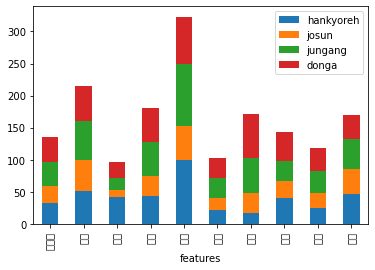

In [104]:
#타블로 쓸 거지만 일단 파이썬으로 시각화 한 번 해보기
plt.figure(figsize=(12,8))
usp.plot.bar(x='features', stacked=True)
plt.show()

In [12]:
usp2 = usp.groupby('tend')[['hankyoreh', 'josun', 'jungang', 'donga']].sum()
usp2 = usp2.T
usp2

tend,neg,pos
hankyoreh,158,288
josun,272,305
jungang,371,562
donga,318,362


<Figure size 864x576 with 0 Axes>

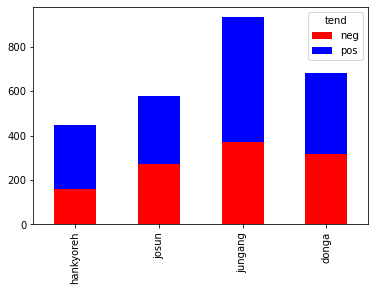

In [13]:
plt.figure(figsize=(12,8))
usp2.plot.bar(stacked=True, cmap='bwr_r')
plt.show()

#전반적으로 긍정 단어가 부정 단어보다 많음..
#바그래프 길이가 달라서 비교하기에 편하진 않은 듯

<Figure size 864x576 with 0 Axes>

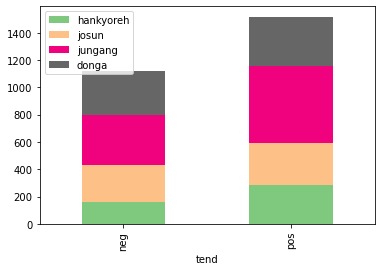

In [18]:
usp2 = usp.groupby('tend')[['hankyoreh', 'josun', 'jungang', 'donga']].sum()

plt.figure(figsize=(12,8))
usp2.plot.bar(stacked=True, cmap='Accent')
plt.show()

In [19]:
#긍/부정 비율로 표현하기

press = ['hankyoreh', 'josun', 'jungang', 'donga']
usp_perc = pd.DataFrame(columns=['press', 'pos_perc', 'neg_perc'])

for i, p in enumerate(press):
    ppos = round(usp[usp['tend']=='pos'][p].sum() / usp[p].sum(), 2)
    pneg = round(usp[usp['tend']=='neg'][p].sum() / usp[p].sum(), 2)
    
    row = [p, ppos, pneg]
    usp_perc.loc[i] = row

usp_perc

,press,pos_perc,neg_perc
0,hankyoreh,0.65,0.35
1,josun,0.53,0.47
2,jungang,0.60,0.40
3,donga,0.53,0.47


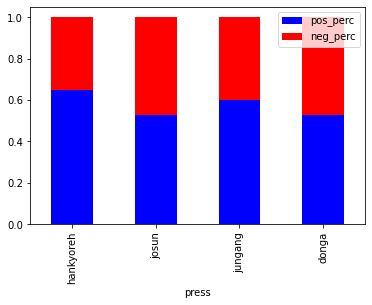

In [20]:
usp_perc.plot.bar(x='press', stacked=True, cmap='bwr')
plt.show()

# 어쨌든 긍정 단어가 부정 단어보다 많은 듯.........
# 비율 그래프로 가면 타 언론사 대비 해당 방송사의 긍부정 비율의 대소를 비교하면 될 듯
# ex. 한겨레가 언론사들 중 pos의 비율이 가장 높고 중앙일보가 neg 비율이 가장 높았다

#### ch_press 중국_언론사

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

cvt = CountVectorizer(max_features=100)
chpt = cvt.fit_transform(ch_press['키워드'])
chpt_feature = cvt.get_feature_names()
chpt_feature

#키워드로 키워드 추출
#긍정: 동맹, 성장, 지원, 평화, 협력, 회담
#부정: 봉쇄, 비판, 위기, 위협, 전쟁, 제재

#최종 키워드
#긍정: 대화, 동맹, 성장, 평화, 협력
#부정: 도발, 비판, 위협, 전쟁, 제재

['가능',
 '가능성',
 '강조',
 '강화',
 '결과',
 '결정',
 '경제',
 '공개',
 '공급망',
 '교수',
 '국가',
 '국민',
 '국제',
 '군사',
 '글로벌',
 '기업',
 '나라',
 '논의',
 '달러',
 '당국',
 '대만',
 '대사',
 '대응',
 '대통령',
 '대표',
 '동맹',
 '러시아',
 '미국',
 '미사일',
 '바이든',
 '반도체',
 '발전',
 '방문',
 '베이징',
 '보도',
 '봉쇄',
 '북한',
 '비판',
 '사드',
 '사실',
 '상황',
 '생각',
 '성장',
 '세계',
 '수출',
 '시작',
 '시장',
 '시진핑',
 '안보',
 '양국',
 '올림픽',
 '외교',
 '우크라이나',
 '위기',
 '위협',
 '유럽',
 '유지',
 '윤석열',
 '이날',
 '인권',
 '인도',
 '일본',
 '입장',
 '장관',
 '전략',
 '전망',
 '전쟁',
 '정부',
 '정상',
 '정책',
 '정치',
 '제재',
 '조치',
 '주석',
 '주장',
 '중국',
 '중요',
 '지난달',
 '지역',
 '지원',
 '지적',
 '참여',
 '총리',
 '추진',
 '침공',
 '코로나',
 '코로나19',
 '투자',
 '평가',
 '평화',
 '포함',
 '한국',
 '한미',
 '한반도',
 '핵심',
 '협력',
 '홍콩',
 '회담',
 '회의',
 '훈련']

In [44]:
features = ['대화', '동맹', '성장', '평화', '협력', '도발', '비판', '위협', '전쟁', '제재']
tend = ['pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg']

han = []
jo = []
jung = []
dong = []

for key in features:
    han.append(len(ch_press[ch_press['언론사'] == '한겨레'][ch_press['제목'].str.contains(key)]))
    
for key in features:
    jo.append(len(ch_press[ch_press['언론사'] == '조선일보'][ch_press['제목'].str.contains(key)]))
    
for key in features:
    jung.append(len(ch_press[ch_press['언론사'] == '중앙일보'][ch_press['제목'].str.contains(key)]))
    
for key in features:
    dong.append(len(ch_press[ch_press['언론사'] == '동아일보'][ch_press['제목'].str.contains(key)]))
    
chp = pd.DataFrame({'features': features,
                    'tend': tend,
                    '한겨레': han,
                   '조선일보': jo,
                   '중앙일보': jung,
                   '동아일보': dong})

chp

,features,tend,한겨레,조선일보,중앙일보,동아일보
0,대화,pos,17,14,28,12
1,동맹,pos,32,44,70,58
2,성장,pos,26,37,46,33
3,평화,pos,15,15,56,22
4,협력,pos,39,44,64,54
5,도발,neg,8,29,62,44
6,비판,neg,21,34,23,37
7,위협,neg,16,30,30,36
8,전쟁,neg,24,43,45,34
9,제재,neg,24,49,66,64


In [20]:
chp.to_csv('C:/Users/USER/Downloads/pol_ch_press.csv', encoding='utf-8-sig', index=False)

In [45]:
chpp = pd.melt(chp,id_vars=['features', 'tend'],value_vars=['한겨레', '조선일보', '중앙일보', '동아일보'],
       var_name='press', value_name='count')
chpp

,features,tend,press,count
0,대화,pos,한겨레,17
1,동맹,pos,한겨레,32
2,성장,pos,한겨레,26
3,평화,pos,한겨레,15
4,협력,pos,한겨레,39
5,도발,neg,한겨레,8
6,비판,neg,한겨레,21
7,위협,neg,한겨레,16
8,전쟁,neg,한겨레,24
9,제재,neg,한겨레,24


<Figure size 864x576 with 0 Axes>

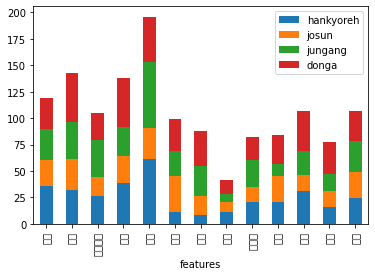

In [90]:
plt.figure(figsize=(12,8))
chp.plot.bar(x='features', stacked=True)
plt.show()

<Figure size 864x576 with 0 Axes>

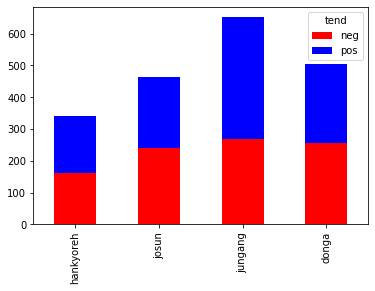

In [21]:
chp2 = chp.groupby('tend')[['hankyoreh', 'josun', 'jungang', 'donga']].sum()
chp2 = chp2.T
chp2

plt.figure(figsize=(12,8))
chp2.plot.bar(stacked=True, cmap='bwr_r')
plt.show()

<Figure size 864x576 with 0 Axes>

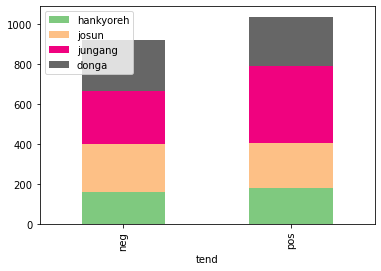

In [25]:
chp2 = chp.groupby('tend')[['hankyoreh', 'josun', 'jungang', 'donga']].sum()

plt.figure(figsize=(12,8))
chp2.plot.bar(stacked=True, cmap='Accent')
plt.show()

In [22]:
#긍/부정 비율로 표현하기

press = ['hankyoreh', 'josun', 'jungang', 'donga']
chp_perc = pd.DataFrame(columns=['press', 'pos_perc', 'neg_perc'])

for i, p in enumerate(press):
    ppos = round(chp[chp['tend']=='pos'][p].sum() / chp[p].sum(), 2)
    pneg = round(chp[chp['tend']=='neg'][p].sum() / chp[p].sum(), 2)
    
    row = [p, ppos, pneg]
    chp_perc.loc[i] = row

chp_perc

,press,pos_perc,neg_perc
0,hankyoreh,0.53,0.47
1,josun,0.49,0.51
2,jungang,0.59,0.41
3,donga,0.49,0.51


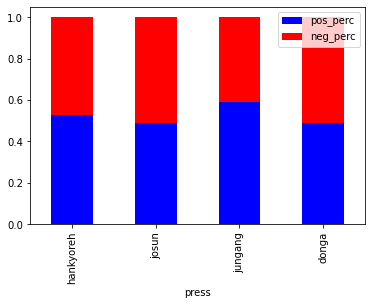

In [23]:
chp_perc.plot.bar(x='press', stacked=True, cmap='bwr')
plt.show()

#부정 키워드를 2개 더 뽑아서 부정 비율도 높게 나옴

#### us_broad 미국_방송사

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cvt = CountVectorizer(max_features=100)
usbk = cvt.fit_transform(us_broad['키워드'])
usbk_feature = cvt.get_feature_names()
usbk_feature

# 긍정: 대화, 동맹, 협력, 협의
# 부정: 도발, 위협, 전쟁, 침공

#us press랑 합친 키워드
#긍정: 대화, 동맹, 평화, 합의, 협력, 협의
#부정: 공격, 도발, 비판, 위협, 전쟁, 침공

# 전반적으로 언론사보다 방송사에서 중립적인 단어가 더 많음

['ytn',
 '가능',
 '가능성',
 '강조',
 '강화',
 '결정',
 '경제',
 '국가',
 '국무부',
 '국민',
 '군사',
 '금리',
 '나라',
 '나토',
 '논의',
 '뉴욕',
 '대북',
 '대응',
 '대통령',
 '대통령실',
 '대표',
 '대화',
 '도발',
 '동맹',
 '러시아',
 '리포트',
 '말씀',
 '물가',
 '미국',
 '미사일',
 '바이든',
 '발사',
 '발언',
 '방문',
 '방안',
 '백신',
 '백악관',
 '보도',
 '북한',
 '사실',
 '사용',
 '상황',
 '생각',
 '설명',
 '세계',
 '시각',
 '시작',
 '안보',
 '앵커',
 '양국',
 '얘기',
 '예상',
 '예정',
 '오미크론',
 '외교',
 '우크라이나',
 '워싱턴',
 '위협',
 '유엔',
 '윤석열',
 '의원',
 '의장',
 '인상',
 '일본',
 '입장',
 '장관',
 '전략',
 '전망',
 '전쟁',
 '정도',
 '정부',
 '정상',
 '정책',
 '제재',
 '조치',
 '준비',
 '중국',
 '중요',
 '지역',
 '지원',
 '진행',
 '추가',
 '침공',
 '코로나19',
 '타이완',
 '특파원',
 '평가',
 '포함',
 '푸틴',
 '한국',
 '한미',
 '한반도',
 '한일',
 '현지',
 '협력',
 '협의',
 '확인',
 '회담',
 '회의',
 '훈련']

In [36]:
features = ['대화', '동맹', '평화', '합의', '협력', '협의', '공격', '도발', '비판', '위협', '전쟁', '침공']
tend = ['pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']

YTN = []
KBS = []
MBC = []
SBS = []

for key in features:
    YTN.append(len(us_broad[us_broad['언론사'] == 'YTN'][us_broad['제목'].str.contains(key)]))
    
for key in features:
    KBS.append(len(us_broad[us_broad['언론사'] == 'KBS'][us_broad['제목'].str.contains(key)]))
    
for key in features:
    MBC.append(len(us_broad[us_broad['언론사'] == 'MBC'][us_broad['제목'].str.contains(key)]))
    
for key in features:
    SBS.append(len(us_broad[us_broad['언론사'] == 'SBS'][us_broad['제목'].str.contains(key)]))
    
usb = pd.DataFrame({'features': features,
                    'tend': tend,
                    'YTN': YTN,
                   'KBS': KBS,
                   'MBC': MBC,
                   'SBS': SBS})

usb

,features,tend,YTN,KBS,MBC,SBS
0,대화,pos,139,49,22,9
1,동맹,pos,178,59,37,13
2,평화,pos,67,15,8,3
3,합의,pos,100,25,18,7
4,협력,pos,224,75,47,26
5,협의,pos,206,56,42,22
6,공격,neg,82,26,9,5
7,도발,neg,223,87,45,26
8,비판,neg,44,18,8,9
9,위협,neg,122,82,26,11


In [25]:
usb.to_csv('C:/Users/USER/Downloads/pol_us_broad.csv', encoding='utf-8-sig', index=False)

In [37]:
usbb = pd.melt(usb,id_vars=['features', 'tend'],value_vars=['YTN', 'KBS', 'MBC', 'SBS'],
       var_name='press', value_name='count')
usbb

,features,tend,press,count
0,대화,pos,YTN,139
1,동맹,pos,YTN,178
2,평화,pos,YTN,67
3,합의,pos,YTN,100
4,협력,pos,YTN,224
5,협의,pos,YTN,206
6,공격,neg,YTN,82
7,도발,neg,YTN,223
8,비판,neg,YTN,44
9,위협,neg,YTN,122


In [31]:
usb2 = usb.groupby('tend')[['YTN', 'KBS', 'MBC', 'SBS']].sum()
usb2 = usb2.T
usb2

tend,neg,pos
YTN,542,747
KBS,230,239
MBC,113,148
SBS,58,70


In [32]:
#긍/부정 비율로 표현하기

press = ['YTN', 'KBS', 'MBC', 'SBS']
usb_perc = pd.DataFrame(columns=['press', 'pos_perc', 'neg_perc'])

for i, p in enumerate(press):
    ppos = round(usb[usb['tend']=='pos'][p].sum() / usb[p].sum(), 2)
    pneg = round(usb[usb['tend']=='neg'][p].sum() / usb[p].sum(), 2)
    
    row = [p, ppos, pneg]
    usb_perc.loc[i] = row

usb_perc

,press,pos_perc,neg_perc
0,YTN,0.58,0.42
1,KBS,0.51,0.49
2,MBC,0.57,0.43
3,SBS,0.55,0.45


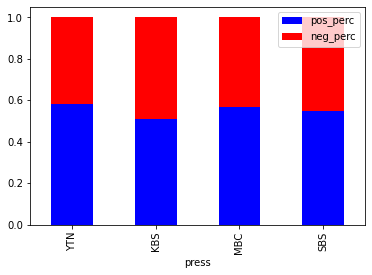

In [33]:
usb_perc.plot.bar(x='press', stacked=True, cmap='bwr')
plt.show()

#### ch_broad 중국_방송사

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cvt = CountVectorizer(max_features=100)
chbk = cvt.fit_transform(ch_broad['키워드'])
chbk_feature = cvt.get_feature_names()
chbk_feature

#긍정: 대화, 동맹, 평화, 협력
#부정: 도발, 제재, 위협, 전쟁

#최종 키워드
#긍정: 대화, 동맹, 성장, 평화, 협력
#부정: 도발, 비판, 위협, 전쟁, 제재

['ytn',
 '가능',
 '가능성',
 '강조',
 '강화',
 '경제',
 '공개',
 '국가',
 '국민',
 '군사',
 '기업',
 '나라',
 '나토',
 '논의',
 '당국',
 '대북',
 '대응',
 '대통령',
 '대표',
 '대화',
 '도발',
 '동맹',
 '러시아',
 '리포트',
 '말씀',
 '미국',
 '미사일',
 '바이든',
 '반도체',
 '발사',
 '발생',
 '방문',
 '방역',
 '베이징',
 '보도',
 '봉쇄',
 '북한',
 '사실',
 '상하이',
 '상황',
 '생각',
 '설명',
 '세계',
 '시작',
 '시진핑',
 '안보',
 '앵커',
 '양국',
 '얘기',
 '예상',
 '예정',
 '올림픽',
 '외교',
 '우리나라',
 '우크라이나',
 '위협',
 '유엔',
 '윤석열',
 '의장',
 '인도',
 '일본',
 '입장',
 '장관',
 '전략',
 '전망',
 '전쟁',
 '정도',
 '정부',
 '정상',
 '정책',
 '제재',
 '조치',
 '주석',
 '주장',
 '중국',
 '중요',
 '지역',
 '지원',
 '진행',
 '참석',
 '총리',
 '추가',
 '추진',
 '코로나',
 '코로나19',
 '타이완',
 '특파원',
 '펠로시',
 '평화',
 '포함',
 '한국',
 '한미',
 '한반도',
 '현지',
 '협력',
 '홍콩',
 '확인',
 '회담',
 '회의',
 '훈련']

In [46]:
features = ['대화', '동맹', '성장', '평화', '협력', '도발', '비판', '위협', '전쟁', '제재']
tend = ['pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg']
#부정 키워드를 더 많이 뽑음

YTN = []
KBS = []
MBC = []
SBS = []

for key in features:
    YTN.append(len(ch_broad[ch_broad['언론사'] == 'YTN'][ch_broad['제목'].str.contains(key)]))
    
for key in features:
    KBS.append(len(ch_broad[ch_broad['언론사'] == 'KBS'][ch_broad['제목'].str.contains(key)]))
    
for key in features:
    MBC.append(len(ch_broad[ch_broad['언론사'] == 'MBC'][ch_broad['제목'].str.contains(key)]))
    
for key in features:
    SBS.append(len(ch_broad[ch_broad['언론사'] == 'SBS'][ch_broad['제목'].str.contains(key)]))
    
chb = pd.DataFrame({'features': features,
                    'tend': tend,
                    'YTN': YTN,
                   'KBS': KBS,
                   'MBC': MBC,
                   'SBS': SBS})

chb

,features,tend,YTN,KBS,MBC,SBS
0,대화,pos,69,28,12,3
1,동맹,pos,73,23,14,6
2,성장,pos,64,30,10,6
3,평화,pos,44,7,6,3
4,협력,pos,166,52,27,22
5,도발,neg,88,63,21,11
6,비판,neg,32,13,8,5
7,위협,neg,55,34,7,6
8,전쟁,neg,49,16,6,2
9,제재,neg,129,48,26,16


In [38]:
chb.to_csv('C:/Users/USER/Downloads/pol_ch_broad.csv', encoding='utf-8-sig', index=False)

In [47]:
chbb = pd.melt(chb,id_vars=['features', 'tend'],value_vars=['YTN', 'KBS', 'MBC', 'SBS'],
       var_name='press', value_name='count')
chbb

,features,tend,press,count
0,대화,pos,YTN,69
1,동맹,pos,YTN,73
2,성장,pos,YTN,64
3,평화,pos,YTN,44
4,협력,pos,YTN,166
5,도발,neg,YTN,88
6,비판,neg,YTN,32
7,위협,neg,YTN,55
8,전쟁,neg,YTN,49
9,제재,neg,YTN,129


In [39]:
chb2 = chb.groupby('tend')[['YTN', 'KBS', 'MBC', 'SBS']].sum()
chb2 = chb2.T
chb2

tend,neg,pos
YTN,321,352
KBS,161,110
MBC,60,59
SBS,35,34


In [40]:
#긍/부정 비율로 표현하기

press = ['YTN', 'KBS', 'MBC', 'SBS']
chb_perc = pd.DataFrame(columns=['press', 'pos_perc', 'neg_perc'])

for i, p in enumerate(press):
    ppos = round(chb[chb['tend']=='pos'][p].sum() / chb[p].sum(), 2)
    pneg = round(chb[chb['tend']=='neg'][p].sum() / chb[p].sum(), 2)
    
    row = [p, ppos, pneg]
    chb_perc.loc[i] = row

chb_perc

,press,pos_perc,neg_perc
0,YTN,0.52,0.48
1,KBS,0.41,0.59
2,MBC,0.50,0.50
3,SBS,0.49,0.51


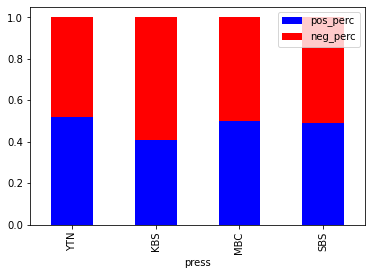

In [41]:
chb_perc.plot.bar(x='press', stacked=True, cmap='bwr')
plt.show()

### US, CH 기사 각각 최종 데이터로 합치기

In [41]:
us = pd.concat([uspp, usbb])
us

,features,tend,press,count
0,대화,pos,한겨레,30
1,동맹,pos,한겨레,51
2,평화,pos,한겨레,22
3,합의,pos,한겨레,42
4,협력,pos,한겨레,44
...,...,...,...,...
43,도발,neg,SBS,26
44,비판,neg,SBS,9
45,위협,neg,SBS,11
46,전쟁,neg,SBS,8


In [42]:
us.to_csv('C:/Users/USER/Downloads/pol_us.csv', encoding='utf-8-sig', index=False)

In [49]:
ch = pd.concat([chpp, chbb])
ch

,features,tend,press,count
0,대화,pos,한겨레,17
1,동맹,pos,한겨레,32
2,성장,pos,한겨레,26
3,평화,pos,한겨레,15
4,협력,pos,한겨레,39
...,...,...,...,...
35,도발,neg,SBS,11
36,비판,neg,SBS,5
37,위협,neg,SBS,6
38,전쟁,neg,SBS,2


In [50]:
ch.to_csv('C:/Users/USER/Downloads/pol_ch.csv', encoding='utf-8-sig', index=False)

## 날짜 별 기사 건수 데이터 만들기

In [51]:
us_broad = pd.read_csv("C:/Users/USER/Desktop/대학/6학기/시각화/dataviz_finalpj/원본데이터/미국_방송사_1년.csv")
us_press = pd.read_csv("C:/Users/USER/Desktop/대학/6학기/시각화/dataviz_finalpj/원본데이터/미국_언론사_1년.csv")

ch_broad = pd.read_csv("C:/Users/USER/Desktop/대학/6학기/시각화/dataviz_finalpj/원본데이터/중국_방송사_1년.csv")
ch_press = pd.read_csv("C:/Users/USER/Desktop/대학/6학기/시각화/dataviz_finalpj/원본데이터/중국_언론사_1년.csv")

In [53]:
ustotal = pd.concat([us_press, us_broad])
chtotal = pd.concat([ch_press, ch_broad])

In [54]:
ustotal.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.101001e+06,20221106,한겨레,NaN,"연준이 몰고 온 달러강세, 막바지 단계 연말 증시에 위안거리",경제>국제경제,경제>외환,국제>미국_북미,NaN,NaN,NaN,NaN,"미국,영국,일본,유럽,경기,선진","유럽,중앙은행,일본중앙은행,연준,러시아","연준,달러강세,막바지,단계,연말,증시,위안거리,원화,가치,달러,대비,20%,하락,인...","연준,유럽,미국,일본,위안거리,지지선,외환시장,선진국,3프로,무탈,가능성,한몫,추세...",올해 원화 가치는 달러 대비 20% 하락했다. 최근 인플레이션의 요인이 다양하듯 달...,http://www.hani.co.kr/arti/economy/stock/10659...,NaN
1,1.100401e+06,20221106,동아일보,필라델피아=문병기,[르포]‘바이든 구하기’ 나선 오바마 vs 트럼프 “내가 마가 왕 레드 웨이브 일 것”,정치>청와대,정치>선거,국제>미국_북미,NaN,NaN,NaN,"바네사,조 바이든,전현직,마,전용기,오마바,트럼프,바이든,펠로시,오바마,낸시 펠로시...","델러웨어,미국,뉴저지,피츠버그,펜실베니아,펜실베이니아,필라델피아","민주당,펜실베이니아,템플대학,NYT,펜실베이니아주,펜실베니아,백악관,뉴욕타임스,세,...","트럼프,오바마,vs,레드,웨이브,중간,선거,최대,격전지,펜실베이니아,5일,현지시간,...","중간선거,민주당,오바마,펜실베이니아,라트롭,미국,지지자,바이든,펜실베니아,공화당,필...",5일(현지시간) 오후 1시경 펜실베이니아주의 주도(州都) 필라델피아. 중간선거를 사...,https://www.donga.com/news/article/all/2022110...,NaN
2,1.100901e+06,20221106,중앙일보,정희윤(chung.heeyun@joongang.co.kr),"이집트서 COP27 개막 개도국, 기후변화 '손실과 피해' 부각",국제>중동_아프리카,국제>미국_북미,국제>아시아,사회>사회갈등>시위,NaN,NaN,"에마뉘엘 마크롱,압델 파타 엘시시,나경원,조 바이든,리시 수낵,볼커","프랑스,우크라이나,미국,투르크,시나이반도,환경운동가,영국,인도,칸쿤,서한,선진,이집...","환경부,CNN,세계은행,한국,유엔,파키스탄,ECRF,정부,대표단,한화진,외무장관,반...","이집트,COP27,개막,개도국,기후,변화,손실,피해,부각,대응,기후,변화,위기,유엔...","기후변화,이집트,cop27,배출량,영국,투르크,샤름,나경원,미국,개발도상국,선진국,사메",기후변화 위기 대응을 위한 제27차 유엔기후변화협약 당사국 회의(COP27)가 6일...,https://www.joongang.co.kr/article/25115256,NaN
3,1.100901e+06,20221106,중앙일보,김필규(phil9@joongang.co.kr),"바이든 오바마 트럼프, 동시에 집결했다 美 중간선거 총력전",국제>미국_북미,정치>선거,정치>청와대,NaN,NaN,NaN,"조 바이든,전현직,샤피로,존 페터만,아널드,더그,트럼프,바이든,오바마,낸시 펠로시,...","미국,하원,피츠버그,네바다,펜실베이니아,경기,차,장악,펜실베이니아주,화력,조지아","리얼클리어폴리틱스,미국,민주당,투미,백악관,상원,필라델피아,공화당,Aga,스크랜턴,...","바이든,오바마,트럼프,동시,집결,총력전,중간,선거,필라델피아,미국,펜실베이니아주,경...","공화당,펜실베이니아,민주당,미국,바이든,오즈,상원의원,페터,여론조사,백악관,중간선거...",미국 펜실베이니아주 필라델피아의 템플대 리아쿠라스 경기장에 조 바이든 대통령과 버락...,https://www.joongang.co.kr/article/25115255,NaN
4,1.100901e+06,20221106,중앙일보,김상진.황수빈(kine3@joongang.co.kr),'비질런트 스톰'에 폭풍도발한 北 한 미 일 안보협력 세진다,정치>북한,정치>외교,NaN,NaN,NaN,NaN,"충무공,기시다 후미오,이종호,이,대조영,기시다,권용수,박원곤","캐나다,평안북도,서해상,이즈모,오산,인도,北,지대,한,북한학과,호주,다국,미국,일본...","한ㆍ미,ADD,DTT,국방대,국방과학연구소,해상자위대,해군심포지엄,미 공군,공군,정...","비질,런트,스톰,폭풍도발,안보,협력,세진다,소양,관함식,해상,사열,ㆍ미,공중,훈련,...","관함식,일본,안보협력,4발,미국,서해,2대,핵실험,박원곤,스톰,t급,4대,국방장관,...",한ㆍ미가 대규모 연합공중훈련인 ‘비질런트 스톰(Vigilant Storm)’을 하루...,https://www.joongang.co.kr/article/25115253,NaN


In [55]:
chtotal.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.101001e+06,20221106,한겨레,김소연 기자,욱일기 휘날린 이즈모에 소양함 ‘경례’ 일 언론 “관계 개선” 전망,국제>일본,정치>북한,국제>중국,사고>산업사고>화재,NaN,NaN,"기시다 후미오,이종호,기시다","가나가와현,남중국해,서구,오스트레일리아,간토,태평양 지역,한국,서태평양해군심포지엄,...","미국,일본,중국,해군,오스트레일리아,준동맹,해상자위대,한국,북한,<니혼게이자이신문,...","욱일기,이즈모,소양,경례,언론,개선,언론,전망,6일,11시,사가미만,일본,가나가와현...","일본,이즈모,관함식,한국,중국,미국,12개국,욱일기,자위대,깃발,국제관함식,대잠,구...",6일 오전 11시40분 일본 가나가와현 사가미만.\n\n 일본 해상자위대 창설 70...,http://www.hani.co.kr/arti/international/japan...,NaN
1,1.100901e+06,20221106,중앙일보,신경진(shin.kyungjin@joongang.co.kr),"시진핑 리창 “개방”, 방역당국 “제로코로나 불변” 中 ‘유체이탈’ 방역",국제>중국,국제>유럽_EU,국제>아시아,사회>사회문제>성차별,NaN,NaN,"왕후닝,미펑","광둥,내몽골,상하이,광저우,구이저우,중국,홍콩,광저우시,란저우,후샹","국가주석,중앙정치국,리창(李强),정치국,중앙라디오방송총국,국가위생건강위원회,중국,쓰...","시진핑,리창,개방,방역,당국,제로코로,불변,유체이탈,방역,중국공산당,중공,기관지,인...","위건위,중국,상하이,기자회견,코로나,훙하오,확진자,순시원,리창,시진핑,후시진,홍콩,...",중국공산당(중공) 기관지 인민일보가 6일 “‘동적 제로화(動態淸零 제로 코로나 정책...,https://www.joongang.co.kr/article/25115258,NaN
2,1.100901e+06,20221106,중앙일보,김상진.황수빈(kine3@joongang.co.kr),'비질런트 스톰'에 폭풍도발한 北 한 미 일 안보협력 세진다,정치>북한,정치>외교,NaN,NaN,NaN,NaN,"충무공,기시다 후미오,이종호,이,대조영,기시다,권용수,박원곤","캐나다,평안북도,서해상,이즈모,오산,인도,北,지대,한,북한학과,호주,다국,미국,일본...","한ㆍ미,ADD,DTT,국방대,국방과학연구소,해상자위대,해군심포지엄,미 공군,공군,정...","비질,런트,스톰,폭풍도발,안보,협력,세진다,소양,관함식,해상,사열,ㆍ미,공중,훈련,...","관함식,일본,안보협력,4발,미국,서해,2대,핵실험,박원곤,스톰,t급,4대,국방장관,...",한ㆍ미가 대규모 연합공중훈련인 ‘비질런트 스톰(Vigilant Storm)’을 하루...,https://www.joongang.co.kr/article/25115253,NaN
3,1.100901e+06,20221106,중앙일보,한영혜(han.younghye@joongang.co.kr),지하철서 비닐 쓴 채 바나나 까먹는 승객 中네티즌 화제 영상,국제>중국,국제>유럽_EU,IT_과학>인터넷_SNS,NaN,NaN,NaN,NaN,"후베이성,우한,중국,펑파이","우한,펑파이","지하철,비닐,바나,승객,네티즌,화제,영상,중국,지하철,비닐,바나나,승객,영상,화제,...","중국,펑파이,왕씨,핼러윈,코로나19,후베이성,오른쪽,네티즌들,우한,배고픔,저혈당,의...",중국 지하철 안에서 커다란 비닐을 뒤집어쓴 채 바나나를 먹고 있는 승객의 영상이 화...,https://www.joongang.co.kr/article/25115246,NaN
4,1.100901e+06,20221106,중앙일보,정진우(dino87@joongang.co.kr),"""中 러가 웃음거리 만들어"" 北 ICBM에도 안보리는 '개점휴업'",정치>북한,국제>중국,NaN,NaN,NaN,NaN,토머스-그린필드,"미국,영국,중국,미,안보리,북한,일,中,러시아","유엔 안전보장이사회,공동성명,한국대사,상임이사국,중국,ICBM,ICB,트위터,북한,...","웃음거리,ICBM,웃음거리,안보리,개점휴업,북한,30차례,탄도미사일,발사,무력,도발...","안보리,미국,중국,icbm,탄도미사일,웃음거리,결의안,상임이사국,토머스,개점휴업,이...",북한이 올 들어 30차례에 걸쳐 탄도미사일을 발사하며 무력 도발을 이어가고 있지만 ...,https://www.joongang.co.kr/article/25115232,NaN


In [61]:
usdate = ustotal['일자'].value_counts().to_frame()
usdate = usdate.reset_index().rename(columns={"index": "date"})
usdate = usdate.rename(columns={'일자':'news_cnt'})
usdate = usdate.sort_values(by='date')
usdate

,date,news_cnt
328,20211106,29
306,20211107,36
234,20211108,59
104,20211109,88
112,20211110,86
...,...,...
25,20221102,123
15,20221103,144
43,20221104,114
238,20221105,58


In [63]:
usdate.to_csv('C:/Users/USER/Downloads/usdate.csv', encoding='utf-8-sig', index=False)

In [62]:
chdate = chtotal['일자'].value_counts().to_frame()
chdate = chdate.reset_index().rename(columns={"index": "date"})
chdate = chdate.rename(columns={'일자':'news_cnt'})
chdate = chdate.sort_values(by='date')
chdate

,date,news_cnt
323,20211106,21
282,20211107,28
46,20211108,80
61,20211109,72
24,20211110,90
...,...,...
150,20221102,51
179,20221103,47
228,20221104,39
280,20221105,28


In [64]:
chdate.to_csv('C:/Users/USER/Downloads/chdate.csv', encoding='utf-8-sig', index=False)

# 버린코드

In [ ]:
# features = ['가능성', '동맹', '합의', '협력', '회담', '경고', '논란', '도발', '우려', '위협', '전쟁']
# tend = ['pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']
# han = []

# for key in features:
#     han.append(len(us_press[us_press['언론사'] == '한겨레'][us_press['제목'].str.contains(key)]))

# usp_han = pd.DataFrame({'features': features,
#                         'tend': tend,
#                        'hankyoreh': han})

# usp_han

# features = ['가능성', '동맹', '합의', '협력', '회담', '경고', '논란', '도발', '우려', '위협', '전쟁']
# tend = ['pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']
# josun = []

# for key in features:
#     josun.append(len(us_press[us_press['언론사'] == '조선일보'][us_press['제목'].str.contains(key)]))
    
# usp_jo = pd.DataFrame({'features': features,
#                         'tend': tend,
#                        'josun': josun})

# usp_jo

# features = ['가능성', '동맹', '합의', '협력', '회담', '경고', '논란', '도발', '우려', '위협', '전쟁']
# tend = ['pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']
# jung = []

# for key in features:
#     jung.append(len(us_press[us_press['언론사'] == '중앙일보'][us_press['제목'].str.contains(key)]))

# usp_jung = pd.DataFrame({'features': features,
#                         'tend': tend,
#                        'jungang': jung})

# usp_jung

# features = ['가능성', '동맹', '합의', '협력', '회담', '경고', '논란', '도발', '우려', '위협', '전쟁']
# tend = ['pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']
# count = []

# for key in features:
#     count.append(len(us_press[us_press['언론사'] == '동아일보'][us_press['제목'].str.contains(key)]))

# usp_dong = pd.DataFrame({'features': features,
#                         'tend': tend,
#                        'donga': count})

# usp_dong

In [ ]:
# features = ['관계', '동맹', '정상회담', '협력', '회담', '논란', '도발', '반발', '보이콧', '비판', '우려', '위협', '전쟁']
# tend = ['pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']
# count = []

# for key in features:
#     count.append(len(ch_press[ch_press['언론사'] == '한겨레'][ch_press['제목'].str.contains(key)]))

# chp_han = pd.DataFrame({'features': features,
#                         'tend': tend,
#                        'hankyoreh': count})

# chp_han

# features = ['관계', '동맹', '정상회담', '협력', '회담', '논란', '도발', '반발', '보이콧', '비판', '우려', '위협', '전쟁']
# tend = ['pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']
# count = []

# for key in features:
#     count.append(len(ch_press[ch_press['언론사'] == '조선일보'][ch_press['제목'].str.contains(key)]))

# chp_jo = pd.DataFrame({'features': features,
#                         'tend': tend,
#                        'josun': count})

# chp_jo

# features = ['관계', '동맹', '정상회담', '협력', '회담', '논란', '도발', '반발', '보이콧', '비판', '우려', '위협', '전쟁']
# tend = ['pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']
# count = []

# for key in features:
#     count.append(len(ch_press[ch_press['언론사'] == '중앙일보'][ch_press['제목'].str.contains(key)]))

# chp_jung = pd.DataFrame({'features': features,
#                         'tend': tend,
#                        'jungang': count})

# chp_jung

# features = ['관계', '동맹', '정상회담', '협력', '회담', '논란', '도발', '반발', '보이콧', '비판', '우려', '위협', '전쟁']
# tend = ['pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']
# count = []

# for key in features:
#     count.append(len(ch_press[ch_press['언론사'] == '동아일보'][ch_press['제목'].str.contains(key)]))

# chp_dong = pd.DataFrame({'features': features,
#                         'tend': tend,
#                        'donga': count})

# chp_dong